In [127]:
# import packages
!pip install dmba
import dmba
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [128]:
# load dataset
df = dmba.load_data('ToyotaCorolla.csv')

In [129]:
# Convert column Fuel_Type and Color to categories
df.Fuel_Type = df.Fuel_Type.astype('category')
df.Color = df.Color.astype('category')

In [130]:
predictors = ['Age_08_04','KM','Fuel_Type','HP','Automatic','Doors','Quarterly_Tax','Mfr_Guarantee','Guarantee_Period','Airco','Automatic_airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar']
outcome = 'Price'

In [131]:
X = pd.get_dummies(df[predictors])
y = df[outcome]

In [132]:
# partition the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [133]:
# Run a full tree
fullTree = DecisionTreeRegressor(random_state = 1)

In [134]:
fullTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [135]:
# Evaluate the tree
regressionSummary(y_train, fullTree.predict(X_train))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000


In [136]:
regressionSummary(y_valid, fullTree.predict(X_valid))


Regression statistics

                      Mean Error (ME) : 73.9461
       Root Mean Squared Error (RMSE) : 1440.1110
            Mean Absolute Error (MAE) : 1107.1843
          Mean Percentage Error (MPE) : -0.4775
Mean Absolute Percentage Error (MAPE) : 10.9358


In [137]:
# Find feature importances
importances = fullTree.feature_importances_

In [138]:
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance':importances})
importance_df = importance_df.sort_values('importance')
print(importance_df)

             feature  importance
16  Fuel_Type_Petrol    0.000034
15  Fuel_Type_Diesel    0.000059
14     Fuel_Type_CNG    0.000305
3          Automatic    0.001328
10         CD_Player    0.001894
7   Guarantee_Period    0.002301
13           Tow_Bar    0.002783
6      Mfr_Guarantee    0.003969
4              Doors    0.004188
8              Airco    0.004615
12       Sport_Model    0.004678
11   Powered_Windows    0.005146
5      Quarterly_Tax    0.008880
9    Automatic_airco    0.013358
2                 HP    0.052097
1                 KM    0.059568
0          Age_08_04    0.834798


In [139]:
# RMSE of training data, to no surprise is 0 as we used a full tree. This may have caused overfitting in the tree (too many branches) causing the RMSE of the validation set to be 1440
# The top 3 features of importance in determining price seem to be Age, KM, and HP.

In [140]:
# Try running a shallower tree
smallTree = DecisionTreeRegressor(max_depth = 5, random_state = 1)

In [141]:
smallTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [142]:
# Evaluate performance
regressionSummary(y_train, smallTree.predict(X_train))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1028.0279
            Mean Absolute Error (MAE) : 773.2770
          Mean Percentage Error (MPE) : -1.0039
Mean Absolute Percentage Error (MAPE) : 7.6715


In [143]:
regressionSummary(y_valid, smallTree.predict(X_valid))


Regression statistics

                      Mean Error (ME) : 67.4074
       Root Mean Squared Error (RMSE) : 1177.3943
            Mean Absolute Error (MAE) : 909.1902
          Mean Percentage Error (MPE) : -0.6160
Mean Absolute Percentage Error (MAPE) : 9.2327


In [144]:
# Here we see with a max depth of 5, the RMSE for the training data is much higher than for a full tree, but that is to be expected.\
# The RMSE for the validation set has been decreased greatly, however, indicating that this may be a better depth for future data.

In [145]:
# Find best parameters
param_grid = {
    'max_depth': [5,10,15,20,25],
    'min_impurity_decrease':[0,0.001,0.005,0.01],
    'min_samples_split':[10,20,30,40,50],
}

In [146]:
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, n_jobs = 1)

In [147]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [148]:
print('Initial parameters ', gridSearch.best_params_)

Initial parameters  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}


In [149]:
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10,11,12],
    'min_impurity_decrease':[0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008],
    'min_samples_split':[10,12,14,16,18,20,22,24,26,28,30],
}

In [150]:
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, n_jobs = 1)

In [151]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_impurity_decrease': [0, 0.001, 0.002, 0.003,
                                                   0.004, 0.005, 0.006, 0.007,
                                                   0.008],
                         'min_samples_split': [10, 12, 14, 16, 18, 20, 22, 24,
                                               26, 28, 30]})

In [152]:
print('Improved parameters ', gridSearch.best_params_)

Improved parameters  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [153]:
# run a model with improved parameters
regTree = gridSearch.best_estimator_

In [154]:
regressionSummary(y_train, regTree.predict(X_train))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1082.6992
            Mean Absolute Error (MAE) : 786.5953
          Mean Percentage Error (MPE) : -0.9986
Mean Absolute Percentage Error (MAPE) : 7.6224


In [155]:
regressionSummary(y_valid, regTree.predict(X_valid))


Regression statistics

                      Mean Error (ME) : 24.8976
       Root Mean Squared Error (RMSE) : 1251.3861
            Mean Absolute Error (MAE) : 958.1684
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.5594


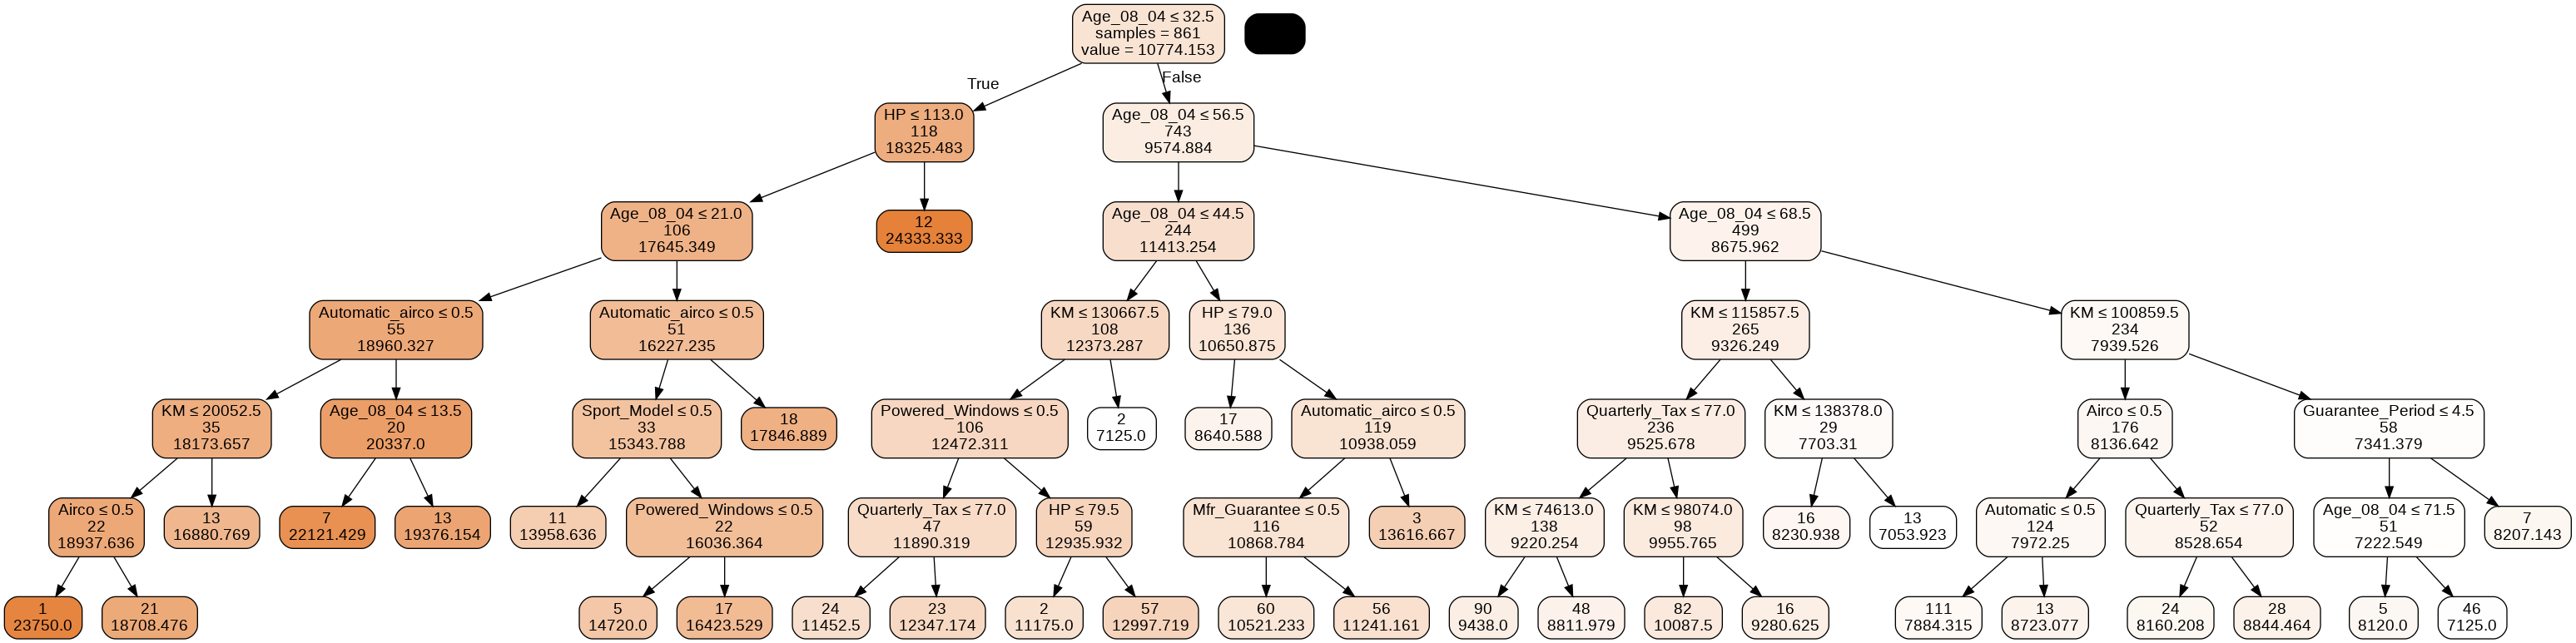

In [156]:
plotDecisionTree(regTree, feature_names = X_train.columns)

In [157]:
# If we follow the above decision tree for the specified Corolla in the assignment, the estimated price will be 7125. The decisions go as follows: F F F F T F

In [158]:
# create bins for the price
df['binned_price'] = pd.cut(df.Price, 20, labels=False)

In [159]:
pd.cut(df.Price, 20).cat.categories

IntervalIndex([(4321.85, 5757.5], (5757.5, 7165.0], (7165.0, 8572.5], (8572.5, 9980.0], (9980.0, 11387.5] ... (25462.5, 26870.0], (26870.0, 28277.5], (28277.5, 29685.0], (29685.0, 31092.5], (31092.5, 32500.0]], dtype='interval[float64, right]')

In [160]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,binned_price
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,6
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,6
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,6
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,7
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,6


In [161]:
X = pd.get_dummies(df[predictors])
y = df['binned_price']

In [162]:
# partition the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [163]:
# Find best parameters
param_grid = {
    'max_depth': [5,10,15,20,25],
    'min_impurity_decrease':[0,0.001,0.005,0.01],
    'min_samples_split':[10,20,30,40,50],
}

In [164]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, n_jobs = 1)

In [165]:
gridSearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [166]:
print('Initial parameters ', gridSearch.best_params_)

Initial parameters  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [167]:
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10,11,12],
    'min_impurity_decrease':[0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008],
    'min_samples_split':[10,12,14,16,18,20,22,24,26,28,30],
}

In [168]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, n_jobs = 1)

In [169]:
gridSearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_impurity_decrease': [0, 0.001, 0.002, 0.003,
                                                   0.004, 0.005, 0.006, 0.007,
                                                   0.008],
                         'min_samples_split': [10, 12, 14, 16, 18, 20, 22, 24,
                                               26, 28, 30]})

In [170]:
print('Improved parameters ', gridSearch.best_params_)

Improved parameters  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 12}


In [171]:
# run a model with improved parameters
classTree = gridSearch.best_estimator_

In [172]:
classificationSummary(y_train, classTree.predict(X_train))

Confusion Matrix (Accuracy 0.5738)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
     0   0   2   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0
     1   0  22  38   2   0   0   0   0   0   0   0   0   0   0   0   0   0
     2   0   7 121  51   0   0   0   0   0   0   0   0   0   0   0   0   0
     3   0   1  42 197   4   7   0   0   0   0   0   0   0   0   0   0   0
     4   0   0   3  63  21  21   1   0   0   0   0   0   0   0   0   0   0
     5   0   0   0  14   4  52  13   0   0   0   0   0   0   0   0   0   0
     6   0   0   0   4   0  17  32   0   2   0   0   3   0   0   0   0   0
     7   0   0   0   0   0   2   9   0   2   0   1   0   0   0   0   0   0
     8   0   0   0   0   0   0   0   0  25   0   4   3   0   0   0   0   0
     9   0   0   0   0   0   0   0   0   4   4   3   2   0   0   0   0   0
    10   0   0   0   1   0   0   0   0   4   0  15   3   0   0   0   0   0
    11   0   0   0   0   0   0   0   0   1   0

In [173]:
classificationSummary(y_valid, classTree.predict(X_valid))

Confusion Matrix (Accuracy 0.4783)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
     0   0   4   2   1   0   1   0   0   0   0   0   0   0   0   0
     1   0   6  24   5   0   1   0   0   0   0   0   0   0   0   0
     2   0   7  65  40   0   1   0   0   0   0   0   0   0   0   0
     3   0   1  44 109   6   3   1   0   0   0   0   0   0   0   0
     4   0   1   0  52  10  16   2   0   0   0   0   0   0   0   0
     5   0   0   0  11   4  43  11   0   0   0   0   0   0   0   0
     6   0   0   0   4   0  12  16   0   0   0   0   0   0   0   0
     7   0   0   0   0   0   2   3   0   4   0   1   0   0   0   0
     8   0   0   0   0   0   0   1   0  15   0   3   1   0   0   0
     9   0   0   0   0   0   0   0   0   0   1   7   2   0   0   0
    10   0   0   0   0   0   0   0   0   5   0   9   2   0   0   0
    11   0   0   0   0   0   0   0   0   0   0   6   1   0   0   0
    12   0   0   0   0   0   0   0   0   1   0   2   4   0   0   0
    13  

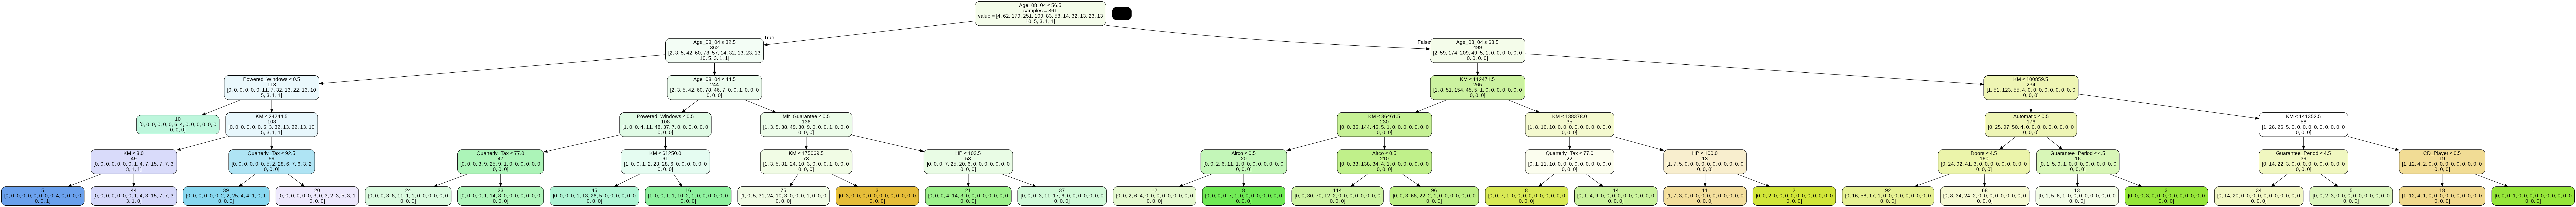

In [174]:
plotDecisionTree(classTree, feature_names = X_train.columns)

In [176]:
# If we follow the above decision tree for the specified Corolla in the assignment, the estimated price will be in bins 3 and 4, in between roughly 7.1-10.0K. The decisions go as follows: F F F T F

In [177]:
# The CT tree is 1 level shallower than the RT tree. The most important predictors seem to be Age and KM in both trees. 
# I believe that the RT tree requires more depth because it predicts exact values rather than sorting results into 'bins' and therefore there is a much higher amount of potential values
# Interestingly enough, the CT tree's prediction of price was higher than the RT tree's prediction.

In [182]:
# Advantages and Disadvantages: It seems that RT trees would be more useful when obtaining an exact predicted value is required while CT trees are more useful when categorizing records into groups.

In [183]:
regTree.tree_.node_count

63

In [184]:
classTree.tree_.node_count

57

In [185]:
# Despite having more depth, the RT tree has only a few more nodes than the CT tree.